## Assingment 3 fra the python bois


2. create a function to read the csv file containing Copenhagen city population data and return a numpy array (numpy.ndarray). hint: use np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1) as in the slides

In [4]:
import numpy as np
pop_array = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(pop_array)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


3. create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries.
How many are there of each? (hint remember that with python you can return multiple values from a function).

In [2]:
def speaking_a_language(dd, mask, n=None):
    if n:
        all_people_speaking = dd[mask & (dd[:,3] == n)]
    else:
        all_people_speaking = dd[mask]
    
    sum_of_people = all_people_speaking[:,4].sum()
    return sum_of_people

def get_english_and_non_speakers(dd_in):
    dd = dd_in
    english_speaking_country = {1: 5314, 2: 5390, 3: 5502, 4: 5514, 5: 5170, 6: 5142}
    mask = ((dd[:,0]== 2015))
    english = np.array([speaking_a_language(dd_in, mask, statecode)for statecode in english_speaking_country.values()])
    return english.sum(), (speaking_a_language(dd_in, mask) - english.sum())

In [5]:
pop1, pop2 = get_english_and_non_speakers(pop_array)
print(str(pop1)+" people form english speaking country")
print(str(pop2)+" from non speaking country")

8979 people form english speaking country
571316 from non speaking country


4. Now create another function that can take 2 arguments:

 - 1: the dataset in the form of a 2dimensional data array where y=data rows and x=[year, area, age nationality, amount].

 - 2: the mask in the form: data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year

 - 3:the return value must be the filtered dataset.

In [46]:
def get_population_from_mask(pop_array, mask):
    population = pop_array[mask]
    return population[:,4].sum()

In [48]:
mask = (pop_array[:,0] == 1999)
print(get_population_from_mask(pop_array, mask))



#statecode2 = {1: 5160, 2: 5170, 3: 5120, 4: 5130}
#swedish = np.array([speaking_a_language(mask,statecode)for statecode in statecode2.values()])
#print(swedish.sum())


491082


5. Create another function that can take 2 arguments:

 - a dataset with same characteristics as above and

 - a value for the x-axis (either year, area, age or nationality)

 - return value should be the accumulated population for all x-values.

 - hint: if year is chosen for x then y is all accumulated amounts from all areas, ages and nationalities.

In [49]:
def get_population_from_year(look_up_list, year):
    population = look_up_list[(look_up_list[:,0] == year)]
    print(population)
    return population[:,4].sum()
get_population_from_year(pop_array, 2015)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [2015   99   82 5100    1]
 [2015   99   86 5289    1]
 [2015   99   90 5289    1]]


580295

6. Create Illustration 1: In your notebook use the above function and create a 2d array of year as x and accumulated amount as y:
  - create a line graph of the population change over time for all of Copenhagen

In [12]:
def x_values_sum(data , column_name_number):
    a_data_dict ={}
   # for year in data[:,column_name_number]:
    for year in np.unique(data[:,column_name_number]):
        mask = (data[:,0]==year)
        a_data_dict[year] = sum(data[mask][:,4])
    return a_data_dict

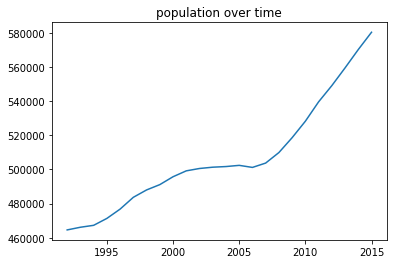

In [15]:
import matplotlib.pyplot as plt
dic = x_values_sum(pop_array,0)
title = "population over time"
plt.title(title, fontsize=12)
plt.plot(dic.keys(),dic.values())
plt.show()


7. Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time

<function matplotlib.pyplot.show(*args, **kw)>

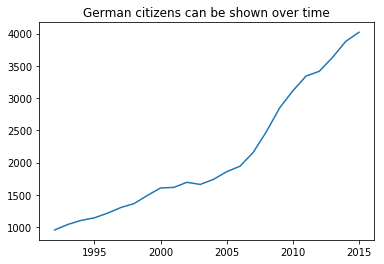

In [16]:
ger_mask = pop_array[:,3]== 5180
ger_dataset = pop_array[ger_mask]
ger_dic = x_values_sum(ger_dataset,0)
title = "German citizens can be shown over time"
plt.title(title, fontsize=12)
plt.plot(ger_dic.keys(),ger_dic.values())
plt.show

8. Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

In [62]:
def get_amount_of_age(data, mask):
    dataset = data[mask]
    amount = {}
    for i in range(len(dataset)):
        if dataset[i, 2] in amount:
            amount[dataset[i, 2]] += dataset[i, 4]
        else:
            amount[dataset[i, 2]] = dataset[i, 4]
    return amount

<function matplotlib.pyplot.show(*args, **kw)>

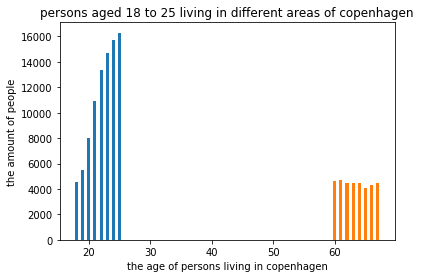

In [67]:
#as there has not been specified any year, we have chosen 2015. else we would have to make a 3d diagram
young_mask = ((pop_array[:,0] == 2015) & (pop_array[:,2] >= 18) & (pop_array[:,2] <= 25) & (pop_array[:,1] < 11))
young_amount = get_amount_of_age(pop_array, young_mask)

old_mask = ((pop_array[:,0] == 2015) & (pop_array[:,2] >= 60) & (pop_array[:,2] <= 67) & (pop_array[:,1] < 11))
old_amount = get_amount_of_age(pop_array, old_mask)

fig,ax = plt.subplots()
title = "persons aged 18 to 25 living in different areas of copenhagen"
plt.title(title, fontsize=12)
ax.bar(young_amount.keys(), young_amount.values(), width = 0.5)
ax.bar(old_amount.keys(), old_amount.values(), width = 0.5)
plt.xlabel("the age of persons living in copenhagen")
plt.ylabel("the amount of people")
plt.show

9. Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. create another similar piechart for Vesterbro.